## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Importing and Checking the Data

In [4]:
#Load the dataset
data = pd.read_csv('Housing.csv')

# Let's take a quick look at the first few rows of the dataset
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
#Print the column names
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
# Summary statistics of the dataset
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
# Check for missing values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

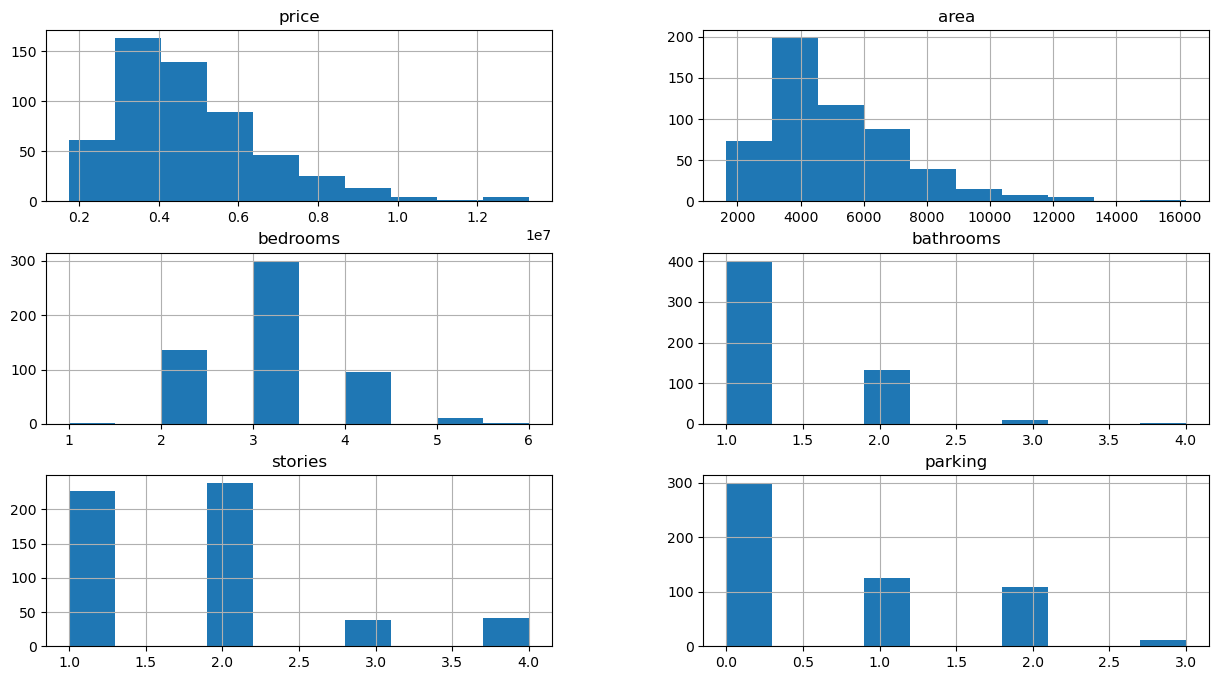

In [18]:
# Plot histograms for all numerical columns in the dataset
data.hist(figsize=(15, 8))

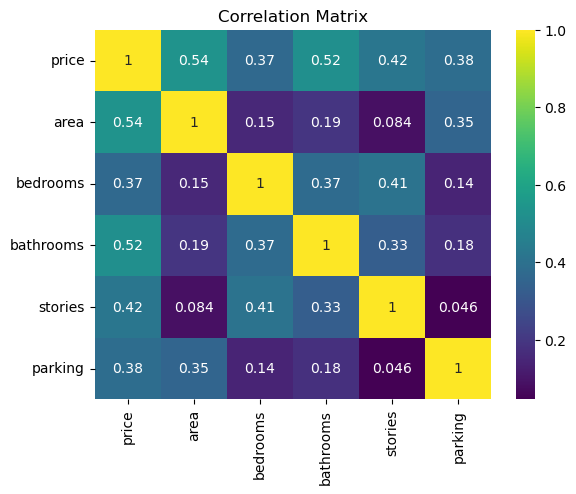

In [23]:
# Select only the numeric columns for correlation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()


## Feature Selection

In [44]:
selected_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] 

X = data[selected_features]
y = data['price']

## Model Training

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: >

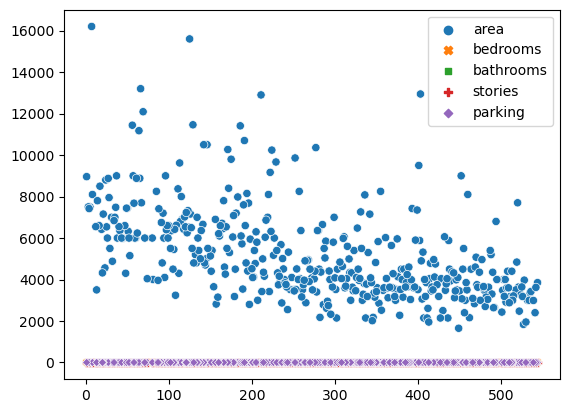

In [46]:
sns.scatterplot(X_train)

## Linear Regression

In [47]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Print the model coefficients
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients: [3.08866956e+02 1.51246751e+05 1.18573171e+06 4.95100763e+05
 3.37660830e+05]
Model intercept: 51999.67680883687


## Model Evaluation

In [35]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)


Mean Squared Error (MSE): 2292721545725.3613
R-squared: 0.5464062355495873


## Actual vs. Predicted Prices

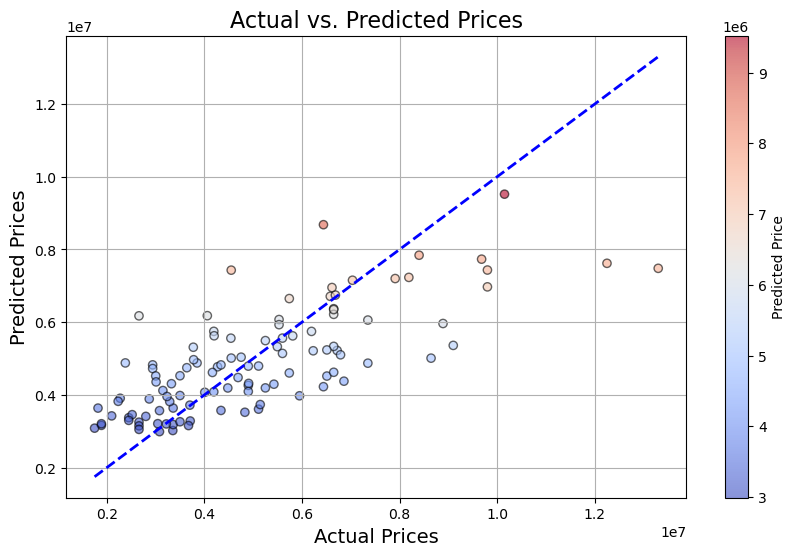

In [38]:
# Enhanced visualization of predicted vs. actual prices
plt.figure(figsize=(10, 6))

# Scatter plot with color coding based on density
scatter = plt.scatter(y_test, y_pred, alpha=0.6, c=y_pred, cmap='coolwarm', edgecolor='k')

# Add a diagonal line for reference (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', lw=2, linestyle='--')

# Labels and title
plt.xlabel("Actual Prices", fontsize=14)
plt.ylabel("Predicted Prices", fontsize=14)
plt.title("Actual vs. Predicted Prices", fontsize=16)

# Add a color bar to indicate the scale
plt.colorbar(scatter, label='Predicted Price')

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()


## Residuals

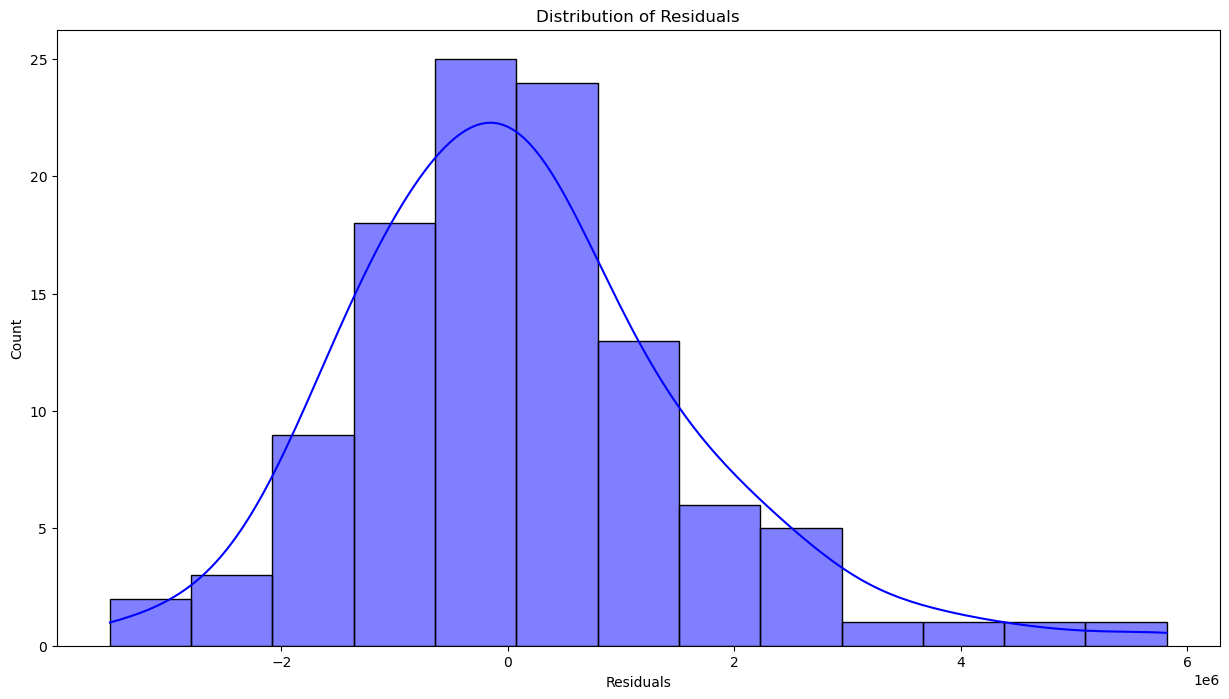

In [48]:
# Plot the residuals (differences between predicted and actual values)
residuals = y_test - y_pred

plt.figure(figsize=(15, 8))
sns.histplot(residuals, kde=True, color='blue')
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()
